In [78]:
import pandas as pd
import gspread as gs
from datetime import datetime as dt
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

# Main Page

## Line Chart

In [79]:
gc = gs.service_account(filename='testdashboard1-be5a120e4282.json')
sheet1 = gc.open("LITGTransaction")

ws = sheet1.worksheet('LITGTrans')
df = pd.DataFrame(ws.get_all_records())

In [80]:
df['date'] = pd.to_datetime(df['date'])
df

,ticker,quantity,price,date,action,sector
0,ABB,258,36.17,2021-12-01,BUY,INDUSTRIALS
1,AAPL,50,166.14,2022-04-21,BUY,TMT
2,BLK,20,795.32,2019-02-12,BUY,FINANCIAL
3,DFS,42,116.34,2022-04-21,BUY,FINANCIAL
4,EOG,66,87.78,2021-10-07,BUY,ENERGY
5,HD,25,309.85,2022-04-21,BUY,INDUSTRIALS
6,JPM,56,168.64,2021-10-18,BUY,FINANCIAL
7,KGC,1340,5.77,2022-03-08,BUY,ENERGY
8,MBUU,116,68.52,2022-02-16,BUY,CONSUMER
9,MCD,94,233.65,2021-09-10,BUY,CONSUMER


In [81]:
sorted_df = df.sort_values(by="date").reset_index()
sorted_df

,index,ticker,quantity,price,date,action,sector
0,18,UNH,14,396.54,2017-02-21,BUY,HEALTHCARE
1,29,URI,66,153.71,2018-02-20,BUY,INDUSTRIALS
2,27,OKE,95,49.35,2018-02-20,BUY,ENERGY
3,21,BERY,48,51.98,2019-02-12,BUY,CONSUMER
4,23,HCA,85,140.65,2019-02-12,BUY,HEALTHCARE
5,2,BLK,20,795.32,2019-02-12,BUY,FINANCIAL
6,30,URI,66,153.71,2019-02-12,BUY,INDUSTRIALS
7,16,SRE,43,137.76,2019-02-12,BUY,ENERGY
8,11,MSFT,209,259.47,2019-02-12,BUY,TMT
9,24,LGIH,35,179.52,2021-05-27,BUY,INDUSTRIALS


In [101]:
f_date = np.min(sorted_df.date) # initial date
e_date = dt.now()#dt.fromtimestamp(dt.date.today())#np.max(sorted_df.date)
num_days = (e_date - f_date).days + 1
num_days

2107

In [102]:
tickers = df.ticker.unique()
price_data = web.DataReader(tickers, "yahoo", f_date, dt.now())['Close']
fund_df = pd.DataFrame()


/Users/kash/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol: 'ZNGA', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [103]:
for n in tickers:
    ticker_holdings = np.zeros(num_days)
    for q in df[df.ticker == n].iloc:
        day = (q.date - f_date).days
        if q.action == "BUY":
            ticker_holdings[day] += q.quantity
        else:
            ticker_holdings[day] -= q.quantity
    for i in np.arange(1, num_days):
        ticker_holdings[i] = ticker_holdings[i - 1] + ticker_holdings[i]
    c = 0
    for date, price in zip(price_data[n].index, price_data[n]):
        day = (date - f_date).days
        while(c < num_days and c <= day):
            ticker_holdings[c] *= price
            c += 1
    fund_df[n] = ticker_holdings

In [104]:
fund_df.index = pd.date_range(start=f_date, end=e_date)

In [105]:
cash_value = np.zeros(num_days)
initial_cash = 300000
cash_value[0] = initial_cash

In [106]:
for n in sorted_df.iloc:
    day = (n.date - f_date).days
    if n.action == "BUY":
        cash_value[day] -= n.quantity * n.price
    else:
        cash_value[day] += n.quantity * n.price


In [107]:
for i in np.arange(1, num_days):
    cash_value[i] = cash_value[i - 1] + cash_value[i]

In [108]:
fund_df['Cash']=cash_value.tolist()
fund_df['Fund_Value']=fund_df[list(fund_df.columns)].sum(axis=1)
fund_df

,ABB,AAPL,BLK,DFS,EOG,HD,JPM,KGC,MBUU,MCD,...,HCA,LGIH,LMT,OLLI,OKE,PLD,URI,ZNGA,Cash,Fund_Value
2017-02-21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,294448.44,296696.420103
2017-02-22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,294448.44,296696.420103
2017-02-23,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,294448.44,296724.840085
2017-02-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,294448.44,296731.279966
2017-02-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,294448.44,296763.760068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-24,8139.899803,7405.500031,14755.600586,4566.660141,9414.239960,8159.500122,7657.440308,5520.799847,6606.200089,25850.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,119169.82,315361.361759
2022-11-25,8139.899803,7405.500031,14755.600586,4566.660141,9414.239960,8159.500122,7657.440308,5520.799847,6606.200089,25850.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,119169.82,315361.361759
2022-11-26,7977.360020,7211.000061,14423.399658,4487.699936,9018.899597,7973.000336,7523.600342,5293.000064,6563.280212,25650.720459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,119169.82,311400.419923
2022-11-27,7977.360020,7211.000061,14423.399658,4487.699936,9018.899597,7973.000336,7523.600342,5293.000064,6563.280212,25650.720459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,119169.82,311400.419923


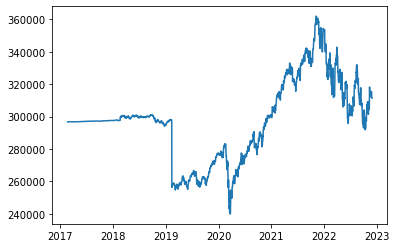

In [109]:
plt.plot(fund_df['Fund_Value'], label='Fund_Value')

In [110]:
fund_df['Fund_Value']#.to_csv("holdings_data.csv")

2017-02-21    296696.420103
2017-02-22    296696.420103
2017-02-23    296724.840085
2017-02-24    296731.279966
2017-02-25    296763.760068
                  ...      
2022-11-24    315361.361759
2022-11-25    315361.361759
2022-11-26    311400.419923
2022-11-27    311400.419923
2022-11-28    311400.419923
Freq: D, Name: Fund_Value, Length: 2107, dtype: float64

## Pie Chart

In [111]:
sectors = pd.DataFrame()
tmt_df=df[df.sector=="TMT"]
industrials_df=df[df.sector=="INDUSTRIALS"]
healthcare_df=df[df.sector=="HEALTHCARE"]
energy_df=df[df.sector=="ENERGY"]
financial_df=df[df.sector=="FINANCIAL"]
consumer_df=df[df.sector=="CONSUMER"]

In [112]:
tmt_tickers = tmt_df.ticker.unique()
industrials_tickers = industrials_df.ticker.unique()
healthcare_tickers = healthcare_df.ticker.unique()
energy_tickers = energy_df.ticker.unique()
financial_tickers = financial_df.ticker.unique()
consumer_tickers = consumer_df.ticker.unique()

In [121]:
sectors['TMTSum'] = fund_df[tmt_tickers].sum(axis=1)
sectors['IndustrialsSum'] = fund_df[industrials_tickers].sum(axis=1)
sectors['HealthcareSum'] = fund_df[healthcare_tickers].sum(axis=1)
sectors['EnergySum'] = fund_df[energy_tickers].sum(axis=1)
sectors['FinancialSum'] = fund_df[financial_tickers].sum(axis=1)
sectors['ConsumerSum'] = fund_df[consumer_tickers].sum(axis=1)

In [122]:
sectors.iloc[-1:]#.to_csv("sectors.csv")

,TMTSum,IndustrialsSum,HealthcareSum,EnergySum,FinancialSum,ConsumerSum,TotalSum
2022-11-28,73753.459229,18400.360403,15402.64003,21324.33974,29104.699821,34245.1007,192230.599923


# Sector Portions:

In [76]:
tmti_date = np.min(tmt_df.date) # initial date
tmte_date = dt.now()
tmtnum_days = (tmte_date - tmti_date).days + 1
tmt_price_data = web.DataReader(tmt_tickers, "yahoo", tmti_date, dt.now())['Close']
tmt_fund_df = pd.DataFrame()

for n in tmt_tickers:
    ticker_holdings = np.zeros(tmtnum_days)
    for q in tmt_df[tmt_df.ticker == n].iloc:
        day = (q.date - tmti_date).days
        if q.action == "BUY":
            ticker_holdings[day] += q.quantity
        else:
            ticker_holdings[day] -= q.quantity
    for i in np.arange(1, tmtnum_days):
        ticker_holdings[i] = ticker_holdings[i - 1] + ticker_holdings[i]
    c = 0
    for date, price in zip(tmt_price_data[n].index, tmt_price_data[n]):
        day = (date - tmti_date).days
        while(c < num_days and c <= day):
            ticker_holdings[c] *= price
            c += 1
    tmt_fund_df[n] = ticker_holdings

tmt_fund_df.index = pd.date_range(start=tmti_date, end=tmte_date)

tmt_fund_df['TMT_Fund_Value']=tmt_fund_df[list(tmt_fund_df.columns)].sum(axis=1)

tmt_fund_df['TMT_Fund_Value']#.to_csv("tmt_holdings_data.csv")



2022-04-25    82667.380791
2022-04-26    79563.700386
2022-04-27    82099.460594
2022-04-28    85664.281235
2022-04-29    82325.567375
                  ...     
2022-11-23    85561.540779
2022-11-24    85230.680748
2022-11-25    85230.680748
2022-11-26      478.000000
2022-11-27      478.000000
Freq: D, Name: TMT_Fund_Value, Length: 217, dtype: float64

In [77]:
tmt_fund_df.iloc[-1:,:-1]

,AAPL,MSFT,NVDA,PTC,GOOGL
2022-11-27,50.0,209.0,40.0,79.0,100.0
